In [202]:
# Name: Günseli Özkan 141044047
import csv
import math
import random
import matplotlib.pyplot as plt
import sys

In [203]:
def extract_election_vote_counts(filename, column_names):
    input_file = csv.DictReader(open(filename))
    ret = []
    for row in input_file:
        for column_name in column_names:
            if(row[column_name] != ''):
                ret.append(int(row[column_name].replace(',','')))
    return ret

In [204]:
################################################################################
#                           PROBLEM 9
# Creating Benford Distribution Histogram
################################################################################
def benford_distribution(numbers):
    frequency = []
    population = {}
    
    for i in range(10):
        population[i] = 0
    for num in numbers:
        strNum = str(num)
        if(len(strNum) != 0):
            most_significant_digit = int(strNum[0])
        if(most_significant_digit != 0):
            pd = math.log10(1+1/most_significant_digit)
        population[most_significant_digit] += pd
            
    for i in range(10):
        frequency.append(population[i]/len(numbers))
    
    return frequency

def get_digits(num):
    digits = []
    while num != 0:
        digits.append(num % 10)
        num = num // 10
    return digits

In [205]:
################################################################################
#                           PROBLEM 9-10-11
# Write a function called plot_x_least_digits_histogram that takes a histogram 
# and graphs the frequencies. Save your plot to a file named scale-invariance.png 
# using pyplot.savefig. The function should return None.
################################################################################
def plot_x_least_digits_histogram(histogram):
    sample = []
    for i in range (1000):
        randF = random.uniform(0,30)
        sample.append(randF)
        
    sampleScaled = []
    for i in range(1000):
        sampleScaled.append(sample[i]*math.pi)
        
    plt.plot([0,1,2,3,4,5,6,7,8,9], benford_distribution(sample),'b-', label = "1000 samples")
    plt.plot([0,1,2,3,4,5,6,7,8,9], benford_distribution(sampleScaled),'r-', label = "1000 samples, scaled by $\pi$")
    plt.plot([0,1,2,3,4,5,6,7,8,9], histogram,'g-', label = "Benford")
    plt.legend();
    plt.xlabel('Digit')
    plt.ylabel('Frequency')
    plt.savefig("scale-invariance.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    plt.show()
    return None

In [206]:
################################################################################
#                           PROBLEM 4
# Write a function called plot_distribution_by_sample_size. This function 
# creates 5 different-sized collections of random numbers. Then, it plots the 
# digit histograms for each of those collections. Your function should save 
# your plot as random-digits.png. The function should return None.
################################################################################
def plot_distribution_by_sample_size():
    data1 = []
    data2 = []
    data3 = []
    data4 = []
    data5 = []
    
    uniform_dist = []
    for i in range(10):
        uniform_dist.append(0.1)
        
    for i in range(10):
        data1.append(random.randint(0,99))
    for i in range(50):
        data2.append(random.randint(0,99))
    for i in range(100):
        data3.append(random.randint(0,99))
    for i in range(1000):
        data4.append(random.randint(0,99))
    for i in range(10000):
        data5.append(random.randint(0,99))
    digits = [0,1,2,3,4,5,6,7,8,9]
    plt.plot(digits, uniform_dist, 'cs', label = "Ideal")
    plt.plot(digits, benford_distribution(data1), 'r-', label = "10")
    plt.plot(digits, benford_distribution(data2), 'g-', label = "50")
    plt.plot(digits, benford_distribution(data3), 'b-', label = "100")
    plt.plot(digits, benford_distribution(data4), 'y-', label = "1000")
    plt.plot(digits, benford_distribution(data5), 'm-', label = "10000")
    plt.legend()
    plt.xlabel('Digit')
    plt.ylabel('Frequency')
    plt.savefig("random-digits.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    return None

In [207]:
################################################################################
#                           PROBLEM 5
# One common measure for the difference/distance between two datasets is the mean 
# squared error. For each corresponding datapoint, compute the difference between 
# the two points, then square it. The overall distance measure is the sum of 
# the squares..
################################################################################
def mean_squared_error(numbers1, numbers2):
    mse = 0
    for i in range(len(numbers1)):
        mse += pow(abs(numbers1[i]-numbers2[i]),2)
    return mse 

In [208]:
################################################################################
#                           PROBLEM 6
# Augment your program with a function called calculate_mse_with_uniform 
# that takes a histogram (as created by ones_and_tens_digit_histogram) and 
# returns the mean squared error of the given histogram with the uniform 
# distribution.
################################################################################
def calculate_mse_with_uniform(histogram):
    uniform_dist = []
    for i in range(10):
        uniform_dist.append(0.1)
    mse = mean_squared_error(histogram,uniform_dist)
    return mse

In [209]:
################################################################################
#                           PROBLEM 6 -CONT
# Augment your program with a function called calculate_mse_with_uniform 
# that takes a histogram (as created by ones_and_tens_digit_histogram) and 
# returns the mean squared error of the given histogram with the uniform 
# distribution.
################################################################################
def compare_x_mse_to_samples(mse):
    largerEq = 0
    smaller = 0
    samples = {}
    
    for i in range(10000):
        samples['l' + str(i)] = []
        for k in range (120):
            samples['l' + str(i)].append(random.randint(1,1000000))
            
    for i in range(10000):
        sampleHist = benford_distribution(samples['l'+str(i)])
        sampleMse = calculate_mse_with_uniform(sampleHist)
        diff = mse - sampleMse
        if(diff >= 0):
            largerEq += 1
        else:
            smaller += 1
        
    print("Quantity of MSEs larger than or equal to the 2009 X election MSE: " + str(largerEq))
    print("Quantity of MSEs smaller than the 2009 X election MSE: " + str(smaller))
    p= smaller/100
    print("2009 election null hypothesis rejection level p: " + str(p))
    return None

<ipython-input-205-0844824e9651>:21: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  plt.savefig("scale-invariance.png", dpi=None, facecolor='w', edgecolor='w',


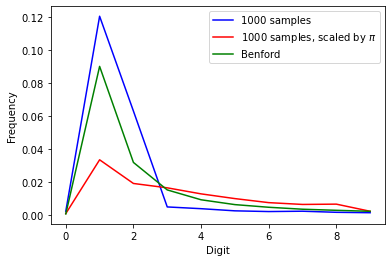

In [210]:
column_names = ["POP_2000", "POP_2003", "POP_2005", "POP_2007"]
votes = extract_election_vote_counts("SUB-EST2009_ALL.csv", column_names)
freq = benford_distribution(votes)
plot_x_least_digits_histogram(freq)